# PRAVEER SAXENA

# BATCH 1814

In [12]:
#Lets import the required libraries
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re
import string
import pprint
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

In [28]:
# imports needed and set up logging
import gzip
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [22]:
#In this case I am going to use data from the OpinRank dataset. This dataset has full user reviews of cars and hotels
#This file is a compressed file
data_file="reviews_data.txt.gz"

In [23]:
#Read files into a list and do preprocessing using gensim- simple_preprocess function
def read_input(input_file):
    """This method reads the input file which is in gzip format"""
    
    logging.info("reading file {0}...this may take a while".format(input_file))
    
    with gzip.open (input_file, 'rb') as f:
        for i, line in enumerate (f): 

            if (i%10000==0):
                logging.info ("read {0} reviews".format (i))
            # do some pre-processing and return a list of words for each review text
            yield gensim.utils.simple_preprocess (line)

# read the tokenized reviews into a list
# each review item becomes a serries of words
# so this becomes a list of lists
documents = list (read_input (data_file))
logging.info ("Done reading data file")

2020-08-22 08:21:10,093 : INFO : reading file reviews_data.txt.gz...this may take a while
2020-08-22 08:21:10,096 : INFO : read 0 reviews
2020-08-22 08:21:12,549 : INFO : read 10000 reviews
2020-08-22 08:21:14,774 : INFO : read 20000 reviews
2020-08-22 08:21:17,347 : INFO : read 30000 reviews
2020-08-22 08:21:19,812 : INFO : read 40000 reviews
2020-08-22 08:21:22,445 : INFO : read 50000 reviews
2020-08-22 08:21:25,099 : INFO : read 60000 reviews
2020-08-22 08:21:27,517 : INFO : read 70000 reviews
2020-08-22 08:21:29,539 : INFO : read 80000 reviews
2020-08-22 08:21:31,611 : INFO : read 90000 reviews
2020-08-22 08:21:33,667 : INFO : read 100000 reviews
2020-08-22 08:21:35,635 : INFO : read 110000 reviews
2020-08-22 08:21:37,612 : INFO : read 120000 reviews
2020-08-22 08:21:39,729 : INFO : read 130000 reviews
2020-08-22 08:21:41,907 : INFO : read 140000 reviews
2020-08-22 08:21:44,000 : INFO : read 150000 reviews
2020-08-22 08:21:46,516 : INFO : read 160000 reviews
2020-08-22 08:21:48,564

# Lets see the  tokens created

In [24]:
documents

[['oct',
  'nice',
  'trendy',
  'hotel',
  'location',
  'not',
  'too',
  'bad',
  'stayed',
  'in',
  'this',
  'hotel',
  'for',
  'one',
  'night',
  'as',
  'this',
  'is',
  'fairly',
  'new',
  'place',
  'some',
  'of',
  'the',
  'taxi',
  'drivers',
  'did',
  'not',
  'know',
  'where',
  'it',
  'was',
  'and',
  'or',
  'did',
  'not',
  'want',
  'to',
  'drive',
  'there',
  'once',
  'have',
  'eventually',
  'arrived',
  'at',
  'the',
  'hotel',
  'was',
  'very',
  'pleasantly',
  'surprised',
  'with',
  'the',
  'decor',
  'of',
  'the',
  'lobby',
  'ground',
  'floor',
  'area',
  'it',
  'was',
  'very',
  'stylish',
  'and',
  'modern',
  'found',
  'the',
  'reception',
  'staff',
  'geeting',
  'me',
  'with',
  'aloha',
  'bit',
  'out',
  'of',
  'place',
  'but',
  'guess',
  'they',
  'are',
  'briefed',
  'to',
  'say',
  'that',
  'to',
  'keep',
  'up',
  'the',
  'coroporate',
  'image',
  'as',
  'have',
  'starwood',
  'preferred',
  'guest',
  'me

# Let's create instance of dictionary

In [29]:
dictionary = corpora.Dictionary()

# Lets Create BOW corpus

In [30]:
BoW_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in documents]

In [31]:
BoW_corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 9),
  (4, 5),
  (5, 3),
  (6, 1),
  (7, 1),
  (8, 6),
  (9, 2),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 2),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 4),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 2),
  (34, 1),
  (35, 1),
  (36, 3),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 2),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 3),
  (66, 1),
  (67, 6),
  (68, 3),
  (69, 1),
  (70, 8),
  (71, 1),
  (72, 6),
  (73, 5),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 3),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1)

# Training the Word2Vec model

In [33]:
model = gensim.models.Word2Vec (documents, size=150, window=10, min_count=2, workers=10)
model.train(documents,total_examples=len(documents),epochs=10)

2020-08-22 09:23:48,964 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2020-08-22 09:23:49,209 : INFO : collecting all words and their counts
2020-08-22 09:23:49,214 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-08-22 09:23:49,794 : INFO : PROGRESS: at sentence #10000, processed 1655714 words, keeping 25777 word types
2020-08-22 09:23:50,600 : INFO : PROGRESS: at sentence #20000, processed 3317863 words, keeping 35016 word types
2020-08-22 09:23:57,951 : INFO : PROGRESS: at sentence #30000, processed 5264072 words, keeping 47518 word types
2020-08-22 09:24:05,871 : INFO : PROGRESS: at sentence #40000, processed 7081746 words, keeping 56675 word types
2020-08-22 09:24:13,490 : INFO : PROGRESS: at sentence #50000, processed 9089491 words, keeping 63744 word types
2020-08-22 09:24:19,497 : INFO : PROGRESS: at sentence #60000, processed 11013723 words, keeping 76781 word types
2020-08-22 09:24:28,855 : INFO : PROGRESS: a

(303496338, 415193550)

# Lets find the most similar 20 words  to a given word in corpus

In [34]:
w1 = "dirty"
model.wv.most_similar (positive=w1,topn=20)

2020-08-22 09:36:08,087 : INFO : precomputing L2-norms of word weight vectors


[('filthy', 0.8754479289054871),
 ('stained', 0.7739133834838867),
 ('unclean', 0.7671118378639221),
 ('smelly', 0.7584418058395386),
 ('grubby', 0.7546576261520386),
 ('dusty', 0.7495331168174744),
 ('gross', 0.7357423305511475),
 ('soiled', 0.727353036403656),
 ('disgusting', 0.7191148996353149),
 ('dingy', 0.7172176837921143),
 ('mouldy', 0.7165994048118591),
 ('grimy', 0.7140685319900513),
 ('moldy', 0.687673807144165),
 ('nasty', 0.6770976781845093),
 ('unkempt', 0.6646213531494141),
 ('filty', 0.6612634658813477),
 ('threadbare', 0.6435650587081909),
 ('grimey', 0.6432676315307617),
 ('grungy', 0.6393033266067505),
 ('disgustingly', 0.6382021307945251)]

In [35]:
w1 = "clean"
model.wv.most_similar (positive=w1,topn=20)

[('spotless', 0.7802095413208008),
 ('immaculate', 0.7451164722442627),
 ('cleanand', 0.5275161266326904),
 ('compact', 0.5080632567405701),
 ('smallish', 0.5007431507110596),
 ('roomy', 0.5005675554275513),
 ('spacious', 0.49790507555007935),
 ('stylish', 0.48924291133880615),
 ('plush', 0.48359036445617676),
 ('imaculate', 0.47479909658432007),
 ('luxurious', 0.47435349225997925),
 ('furnishings', 0.4692811369895935),
 ('tasteful', 0.4423316419124603),
 ('large', 0.44178861379623413),
 ('pristine', 0.4383818507194519),
 ('decor', 0.4382305145263672),
 ('cleana', 0.4376294016838074),
 ('nice', 0.43474969267845154),
 ('furnishing', 0.43308961391448975),
 ('adequate', 0.4311385154724121)]

In [36]:
w1 = "happy"
model.wv.most_similar (positive=w1,topn=20)

[('pleased', 0.8111221790313721),
 ('satisfied', 0.7428631782531738),
 ('thrilled', 0.6510715484619141),
 ('delighted', 0.6490980386734009),
 ('impressed', 0.6435368657112122),
 ('disappointed', 0.6030449867248535),
 ('dissapointed', 0.5652648210525513),
 ('grateful', 0.565032958984375),
 ('dissappointed', 0.5318317413330078),
 ('willing', 0.5301666259765625),
 ('unhappy', 0.5174732804298401),
 ('dissatisfied', 0.5052394270896912),
 ('thankful', 0.5034780502319336),
 ('content', 0.49927398562431335),
 ('displeased', 0.49807047843933105),
 ('disapointed', 0.4922400712966919),
 ('keen', 0.48760390281677246),
 ('unimpressed', 0.4571167826652527),
 ('obliging', 0.4538867175579071),
 ('excited', 0.45287007093429565)]

# Lets us take 20 tokens from corpus and find similarity among them

In [37]:
my_tokens = ["dirty","filthy",'smelly','stained','unclean','clean','spotless','immaculate','large','nice','happy','pleased','satisfied','thrilled','delighted','dissatisfied','unhappy','impressed','obliging','thankful']
for i in range(len(my_tokens)):
    for x in range(len(my_tokens)):
        print('The similarity between {} and {} is {}'.format(my_tokens[i],my_tokens[x],model.wv.similarity(w1=my_tokens[i],w2=my_tokens[x])))


The similarity between dirty and dirty is 1.0
The similarity between dirty and filthy is 0.8754478693008423
The similarity between dirty and smelly is 0.7584419250488281
The similarity between dirty and stained is 0.7739133834838867
The similarity between dirty and unclean is 0.7671118974685669
The similarity between dirty and clean is 0.25139158964157104
The similarity between dirty and spotless is 0.2410762757062912
The similarity between dirty and immaculate is 0.17764469981193542
The similarity between dirty and large is 0.10065840929746628
The similarity between dirty and nice is 0.12145501375198364
The similarity between dirty and happy is -0.06874386966228485
The similarity between dirty and pleased is 0.03172464668750763
The similarity between dirty and satisfied is 0.049053359776735306
The similarity between dirty and thrilled is 0.03900234401226044
The similarity between dirty and delighted is -0.054012130945920944
The similarity between dirty and dissatisfied is 0.1220095604

#  2D graph to see words similarity of  same 20 tokens

C:\Anaconda3\envs\dlib_env\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


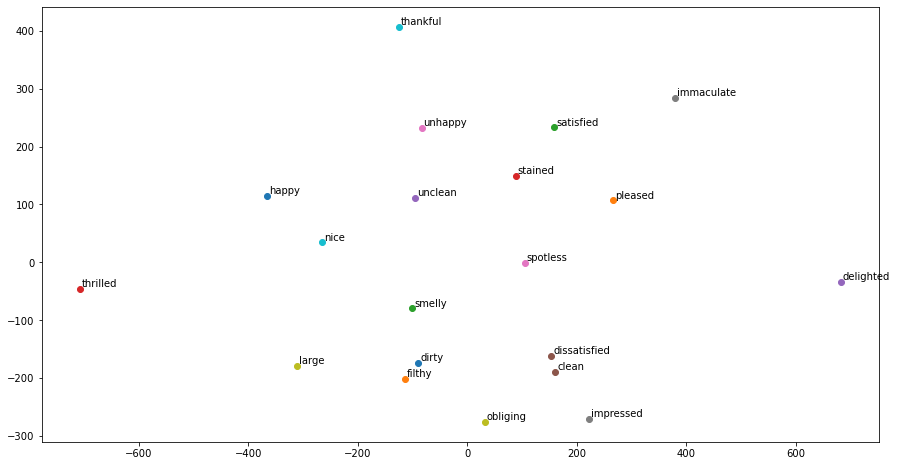

In [38]:
from sklearn.manifold import  TSNE
vocab = ["dirty","filthy",'smelly','stained','unclean','clean','spotless','immaculate','large','nice','happy','pleased','satisfied','thrilled','delighted','dissatisfied','unhappy','impressed','obliging','thankful']


def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)